In [67]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats


In [68]:
URL ='https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
response = requests.get(URL)

In [69]:
df_chicago = pd.read_csv('/datasets/project_sql_result_04.csv')

In [70]:
df_taxis = pd.read_csv('/datasets/project_sql_result_01.csv')

In [71]:
print(df_chicago.head)

<bound method NDFrame.head of    dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]>


In [72]:
top_barrios= df_chicago.sort_values(by='average_trips', ascending=False)

In [73]:
top_10 = top_barrios.head(10) #para visualizar los 10 barrios con mayor cantidad de viajes

# Graficos

In [74]:
top_10.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


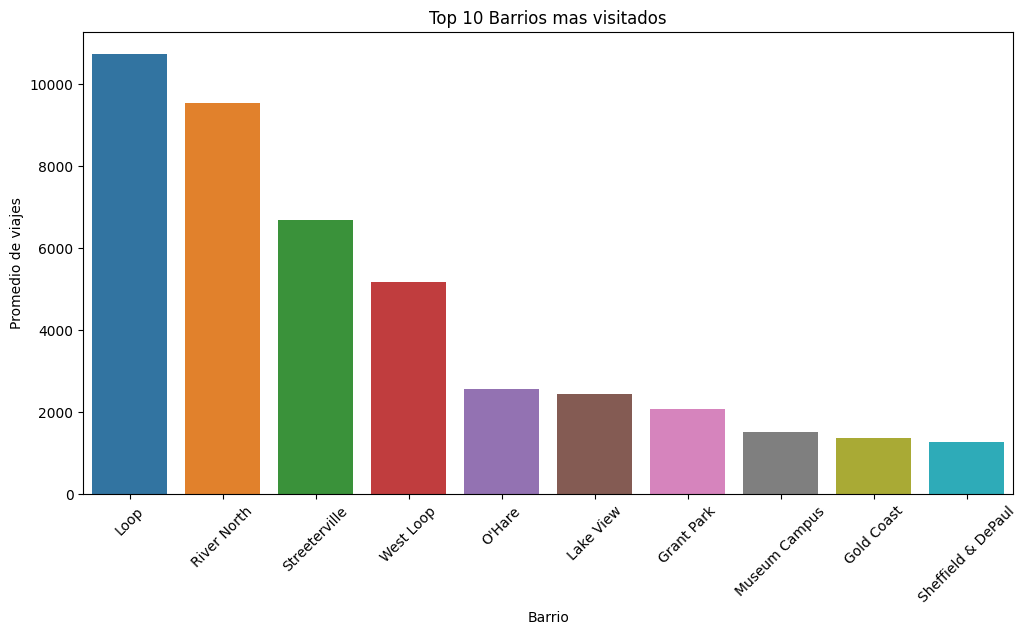

In [75]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_10, x='dropoff_location_name', y='average_trips')
plt.xticks(rotation = 45)
plt.title('Top 10 Barrios mas visitados')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.show()

Podemos observar el barrio loop como el barrio dende mas se finalizan los viajes de de las empresas de taxis, pudiendo decir qque este barrio es el mas visitado, seguido por river north, streeterville y west loop, los cuales alcanzan un promedio de mas de 6000 viajes.

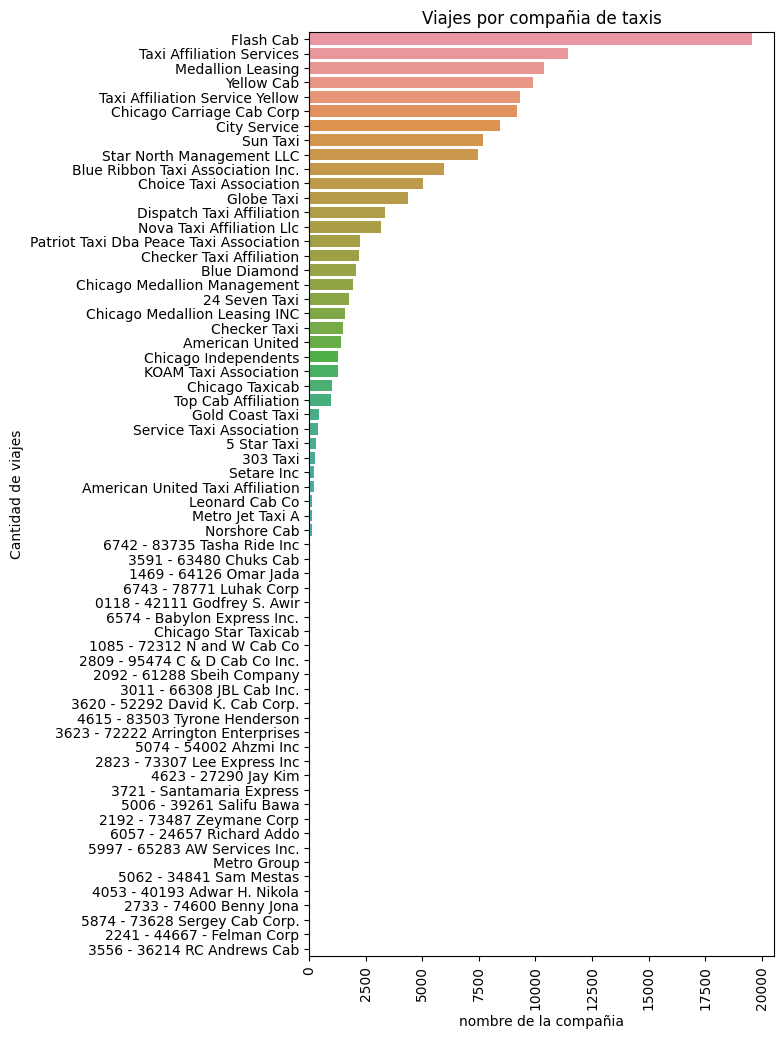

In [76]:
df_taxis = df_taxis.sort_values(by = 'trips_amount', ascending=False)
plt.figure(figsize = (6,12))
sns.barplot(data = df_taxis, x='trips_amount', y= 'company_name')
plt.xticks(rotation = 90)
plt.title('Viajes por compañia de taxis')
plt.xlabel('nombre de la compañia')
plt.ylabel('Cantidad de viajes')
plt.show()

Como podemos observar en el grafico de barras la empresa de taxis que mas cantidad de viajes realiza es 'Flesh Cab', seguida por 'taxi affiliation services' y por 'Medallion leasing', siendo el top 3 de empresas de transporte en chicago, representando mas del 50% del total de los viiajes para la ciudad de chicago

# Prueba de hipotesis

#### Hipótesis Nula (H₀): El clima NO tiene efecto en la duración de los viajes los sábados entre las ubicaciones 50 y 63.

#### Hipótesis Alternativa (H₁): El clima SÍ tiene un efecto directo en la duración de los viajes los sábados entre las ubicaciones 50 y 63.

In [77]:
df_taxis.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [78]:
df_airport = pd.read_csv('/datasets/project_sql_result_07.csv')

In [79]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [80]:
df_airport['start_ts'] = pd.to_datetime(df_airport['start_ts'])
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [81]:
df_airport['dia_semana']= df_airport['start_ts'].dt.dayofweek

In [82]:
df_airport.head(5)

,start_ts,weather_conditions,duration_seconds,dia_semana
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [83]:
condicion_climatica = df_airport[df_airport['dia_semana'] == 5]

In [84]:
condicion_climatica['duration_minutes'] = ((condicion_climatica['duration_seconds'])/60)

In [85]:
# Separar los datos por condiciones climáticas
viajes_buen_clima = condicion_climatica[condicion_climatica['weather_conditions'] == 'Good']['duration_minutes']
viajes_mal_clima = condicion_climatica[condicion_climatica['weather_conditions'] == 'Bad']['duration_minutes']

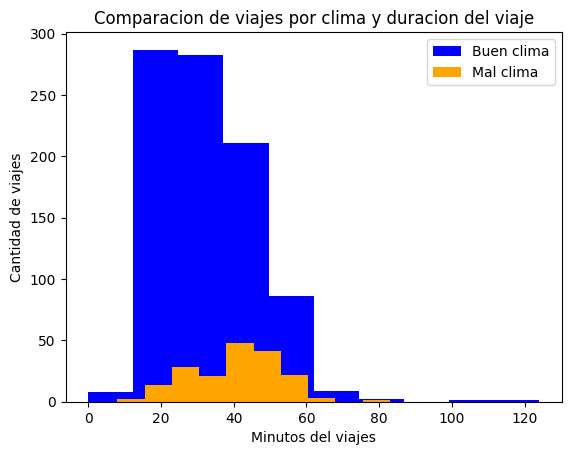

In [86]:
viajes_buen_clima.plot(kind="hist", color='blue', label='Buen clima')
viajes_mal_clima.plot(kind="hist", color='orange', label='Mal clima')
plt.legend()
plt.xlabel('Minutos del viajes')
plt.ylabel('Cantidad de viajes')
plt.title('Comparacion de viajes por clima y duracion del viaje')
plt.show()


In [87]:
print("Viajes con buen clima:", len(viajes_buen_clima))
print("Viajes con mal clima:", len(viajes_mal_clima))
print("Duración promedio - Buen clima:", viajes_buen_clima.mean())
print("Duración promedio - Mal clima:", viajes_mal_clima.mean())

Viajes con buen clima: 888
Viajes con mal clima: 180
Duración promedio - Buen clima: 33.32792792792793
Duración promedio - Mal clima: 40.45342592592593


Resultados exploratorios:

Viajes con buen clima: 888 viajes (promedio: 1999.7 segundos ≈ 33.3 minutos)
Viajes con mal clima: 180 viajes (promedio: 2427.2 segundos ≈ 40.5 minutos)

In [88]:
# Prueba t de dos muestras independientes (unilateral)
statistic, p_value = stats.ttest_ind(viajes_mal_clima, viajes_buen_clima)

print(f"Estadístico t: {statistic}")
print(f"Valor p: {p_value}")

Estadístico t: 6.946177714041492
Valor p: 6.517970327099828e-12


In [89]:
alpha= 0.05

In [90]:
results = stats.ttest_ind( viajes_mal_clima, viajes_buen_clima)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('Valor p:', results.pvalue)# tu código: imprime el valor p obtenido)

if  results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 6.517970327099828e-12
Rechazamos la hipótesis nula


### Como se planteo la hipotesis nula?
La hipoptesisi nula me sirve para comparar dos igualdades y decir que una de esas dos igualdades no se cumple, en este ejercicio comparamos la condicion de weather_condicion igual a bad y weather conditions igual a good, diciendo que si el tiempo de los viajes es dependiente a la variable de la columna weather_conditions, normalmente usamos hipoteis nula para decir que una condicion no se cumple, en este caso rechazamos el hipotesis nula por lo tanto decimos que la hipotesis alternativa se cumple.

### Criterio para probar la hipotesis nula
Para probar la hipotesis nula se realiza una prueba T, en la cual se busca compara dos condiciones,se calcula un valor P para esta prueba y se determina un valor para alpha, si el valor p es menor que el valor de alpha se puede rechazar la hipotesis nula.

### Conclusion

Vamos a decir que nuestra hipotesis alternativa se cumple, lo cual nos dice que las condiciones climaticas son una variable que afecta directamente la duracion de los tiempos de los viajes de la empresa Zuber, esto se pudiera deber al incremento de los embotellamientos de transito, a la disminucion de la velocidad de los vehiculos, las inundaciones y la falta de visibilidad, lo cual hace que los tiempos de traslados incrementen.